In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns

In [2]:
raw_df = pd.read_csv("weatherAUS.csv")

In [3]:
raw_df.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [4]:
raw_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_20124/4238322187.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x = pd.to_datetime(raw_df.Date).dt.year, palette='Reds')


<Axes: xlabel='Date', ylabel='count'>

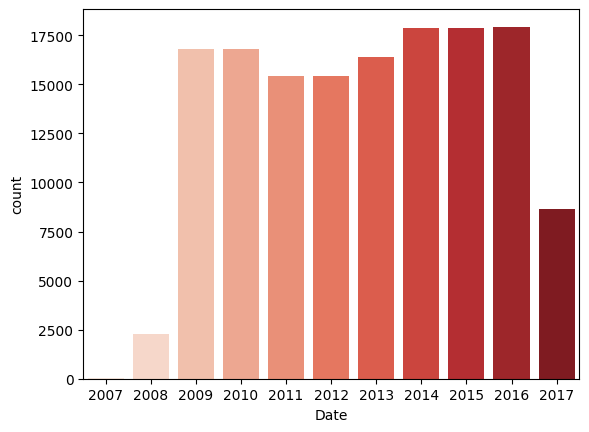

In [5]:
sns.countplot( x = pd.to_datetime(raw_df.Date).dt.year, palette='Reds')

## Data Splitting based on year 

In [6]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year<2015]
val_df = raw_df[year==2015]
test_df = raw_df[year >2015]

In [7]:
print("trainShpae : " , train_df.shape)
print("valShape : " , val_df.shape)
print("TestShape : " , test_df.shape)

trainShpae :  (101018, 23)
valShape :  (17885, 23)
TestShape :  (26557, 23)


In [8]:
input_cols = list(train_df.columns)[1:-1] # no date cause model will be used in future 
target_col = 'RainTomorrow'

In [9]:
train_inputs = train_df[input_cols].copy()
train_targets  = train_df[target_col].copy()

In [10]:
val_inputs = val_df[input_cols].copy()
val_targets  = val_df[target_col].copy()

In [11]:
test_inputs = test_df[input_cols].copy()
test_targets  = test_df[target_col].copy()

In [12]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

## Imputing Missing Values

In [13]:
train_inputs.isna().sum().sort_values(ascending=False)

Sunshine         42008
Evaporation      38486
Cloud3pm         38130
Cloud9am         37105
Pressure9am       9800
Pressure3pm       9766
WindDir9am        7745
WindGustDir       7665
WindGustSpeed     7623
WindDir3pm        2367
RainToday         2031
Rainfall          2031
Humidity9am       1590
Humidity3pm       1504
WindSpeed3pm      1462
WindSpeed9am      1454
Temp9am           1105
Temp3pm            978
MinTemp            736
MaxTemp            534
Location             0
dtype: int64

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
imputer = SimpleImputer(strategy = 'mean')

In [16]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

In [17]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

## Scaling Numeric Values

In [18]:
train_inputs.describe().loc[['min','max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,-8.5,-4.1,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,980.5,979.0,0.0,0.0,-5.9,-5.1
max,33.9,48.1,371.0,82.4,14.3,135.0,87.0,87.0,100.0,100.0,1041.0,1039.6,9.0,9.0,40.2,46.1


In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [22]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [23]:
train_inputs.describe().loc[['min','max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.0,0.013233,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0304,0.0,0.0,0.027426,0.005758
max,1.0,1.000000,1.0,0.568276,0.986207,1.0,0.669231,1.0,1.0,1.0,1.0,1.0000,1.0,1.0,1.000000,0.988484


## Encoding Categorical data

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
train_inputs[categorical_cols] = train_inputs[categorical_cols].fillna('unknown')
val_inputs[categorical_cols] = val_inputs[categorical_cols].fillna('unknown')
test_inputs[categorical_cols] = test_inputs[categorical_cols].fillna('unknown')

In [26]:
encoder = OneHotEncoder(sparse_output=False , handle_unknown='ignore').fit(raw_df[categorical_cols])

In [27]:
encoder_cols = list(encoder.get_feature_names_out(categorical_cols))

In [28]:

train_inputs[encoder_cols] =encoder.transform(train_inputs[categorical_cols]) 

/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_20124/458798285.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoder_cols] =encoder.transform(train_inputs[categorical_cols])
/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_20124/458798285.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoder_cols] =encoder.transform(train_inputs[categorical_cols])
/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_20124/458798285.py:1: PerformanceWarning: DataFrame is highly fra

In [29]:
val_inputs[encoder_cols] =encoder.transform(val_inputs[categorical_cols]) 
test_inputs[encoder_cols] =encoder.transform(test_inputs[categorical_cols]) 

/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_20124/1721396323.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoder_cols] =encoder.transform(val_inputs[categorical_cols])
/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_20124/1721396323.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoder_cols] =encoder.transform(val_inputs[categorical_cols])
/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_20124/1721396323.py:1: PerformanceWarning: DataFrame is highly fragment

In [30]:
val_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
2133,Albury,0.469340,0.724008,0.0,0.037712,0.524909,WSW,0.186047,ESE,W,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2134,Albury,0.566038,0.839319,0.0,0.037712,0.524909,NE,0.387597,ESE,ESE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2135,Albury,0.603774,0.814745,0.0,0.037712,0.524909,NNE,0.325581,NE,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2136,Albury,0.813679,0.716446,0.0,0.037712,0.524909,NNE,0.271318,ESE,W,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2137,Albury,0.648585,0.756144,0.0,0.037712,0.524909,E,0.209302,SSE,SE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144913,Uluru,0.683962,0.746692,0.0,0.037712,0.524909,E,0.356589,ESE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144914,Uluru,0.625000,0.778828,0.0,0.037712,0.524909,ESE,0.372093,E,ESE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144915,Uluru,0.613208,0.792060,0.0,0.037712,0.524909,E,0.387597,E,SE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144916,Uluru,0.672170,0.826087,0.0,0.037712,0.524909,E,0.410853,E,SSE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Remove all String Categorical colums 

In [31]:

X_train = train_inputs[encoder_cols + numeric_cols]

In [32]:
X_val = val_inputs[encoder_cols + numeric_cols]
X_test = test_inputs[encoder_cols + numeric_cols]

In [33]:
X_test.head()

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
2498,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.080460,0.46,0.17,0.543802,0.5136,0.777778,0.333333,0.702532,0.808061
2499,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.069231,0.195402,0.54,0.30,0.505785,0.5008,0.888889,0.888889,0.675105,0.712092
2500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.084615,0.448276,0.62,0.67,0.553719,0.6032,0.888889,0.888889,0.611814,0.477927
2501,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.069231,0.195402,0.74,0.65,0.618182,0.6304,0.888889,0.888889,0.556962,0.518234
2502,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.046154,0.103448,0.92,0.63,0.591736,0.5888,0.888889,0.888889,0.514768,0.529750


## Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
train_targets = train_targets.fillna(method='ffill')
val_targets = val_targets.fillna(method='ffill')

/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_20124/4209364400.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_targets = train_targets.fillna(method='ffill')
/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_20124/4209364400.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  val_targets = val_targets.fillna(method='ffill')


In [45]:
%%time
model = DecisionTreeClassifier(random_state=42 )
model.fit(X_train, train_targets)

CPU times: user 2.55 s, sys: 58 ms, total: 2.61 s
Wall time: 2.66 s


DecisionTreeClassifier(random_state=42)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [47]:
train_preds  = model.predict(X_train)

In [58]:
pd.DataFrame({'preds': train_preds, 'targets': train_targets})

,preds,targets
0,No,No
1,No,No
2,No,No
3,No,No
4,No,No
...,...,...
144548,No,No
144549,No,No
144550,No,No
144551,No,No


In [59]:
train_targets.value_counts()

RainTomorrow
No     78072
Yes    22946
Name: count, dtype: int64

In [61]:
pd.value_counts(train_preds)

/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_20124/1258350197.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_preds)


No     78092
Yes    22926
Name: count, dtype: int64

In [62]:
accuracy_score(train_targets,train_preds)

0.9996832247718228

In [63]:
train_probs = model.predict_proba(X_train)

In [64]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [71]:
model.score(X_val,val_targets)

0.7934582051998882

Location_Adelaide         0
Location_Albany           0
Location_Albury           0
Location_AliceSprings     0
Location_BadgerysCreek    0
                         ..
Pressure3pm               0
Cloud9am                  0
Cloud3pm                  0
Temp9am                   0
Temp3pm                   0
Length: 119, dtype: int64

In [73]:
val_targets.value_counts() / len(val_targets)
#always No saying  Dumb Model predicts 79%  

RainTomorrow
No     0.790383
Yes    0.209617
Name: count, dtype: float64

## Overfitting Improvements 

In [74]:
from sklearn.tree import plot_tree, export_text

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.351\nsamples = 101018\nvalue = [78072, 22946]'),
 Text(0.25, 0.625, 'Rainfall <= 0.003\ngini = 0.252\nsamples = 84103\nvalue = [71653, 12450]'),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.193\nsamples = 68404\nvalue = [60995, 7409]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.513\ngini = 0.436\nsamples = 15699\nvalue = [10658, 5041]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.471\nsamples = 16915\nvalue = [6419, 10496]'),
 Text(0.625, 0.375, 'Rainfall <= 0.003\ngini = 0.499\nsamples = 9303\nvalue = [4881.0, 4422.0]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.009\ngini = 0.322\nsamples = 7612\nvalue = [1538, 6074]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

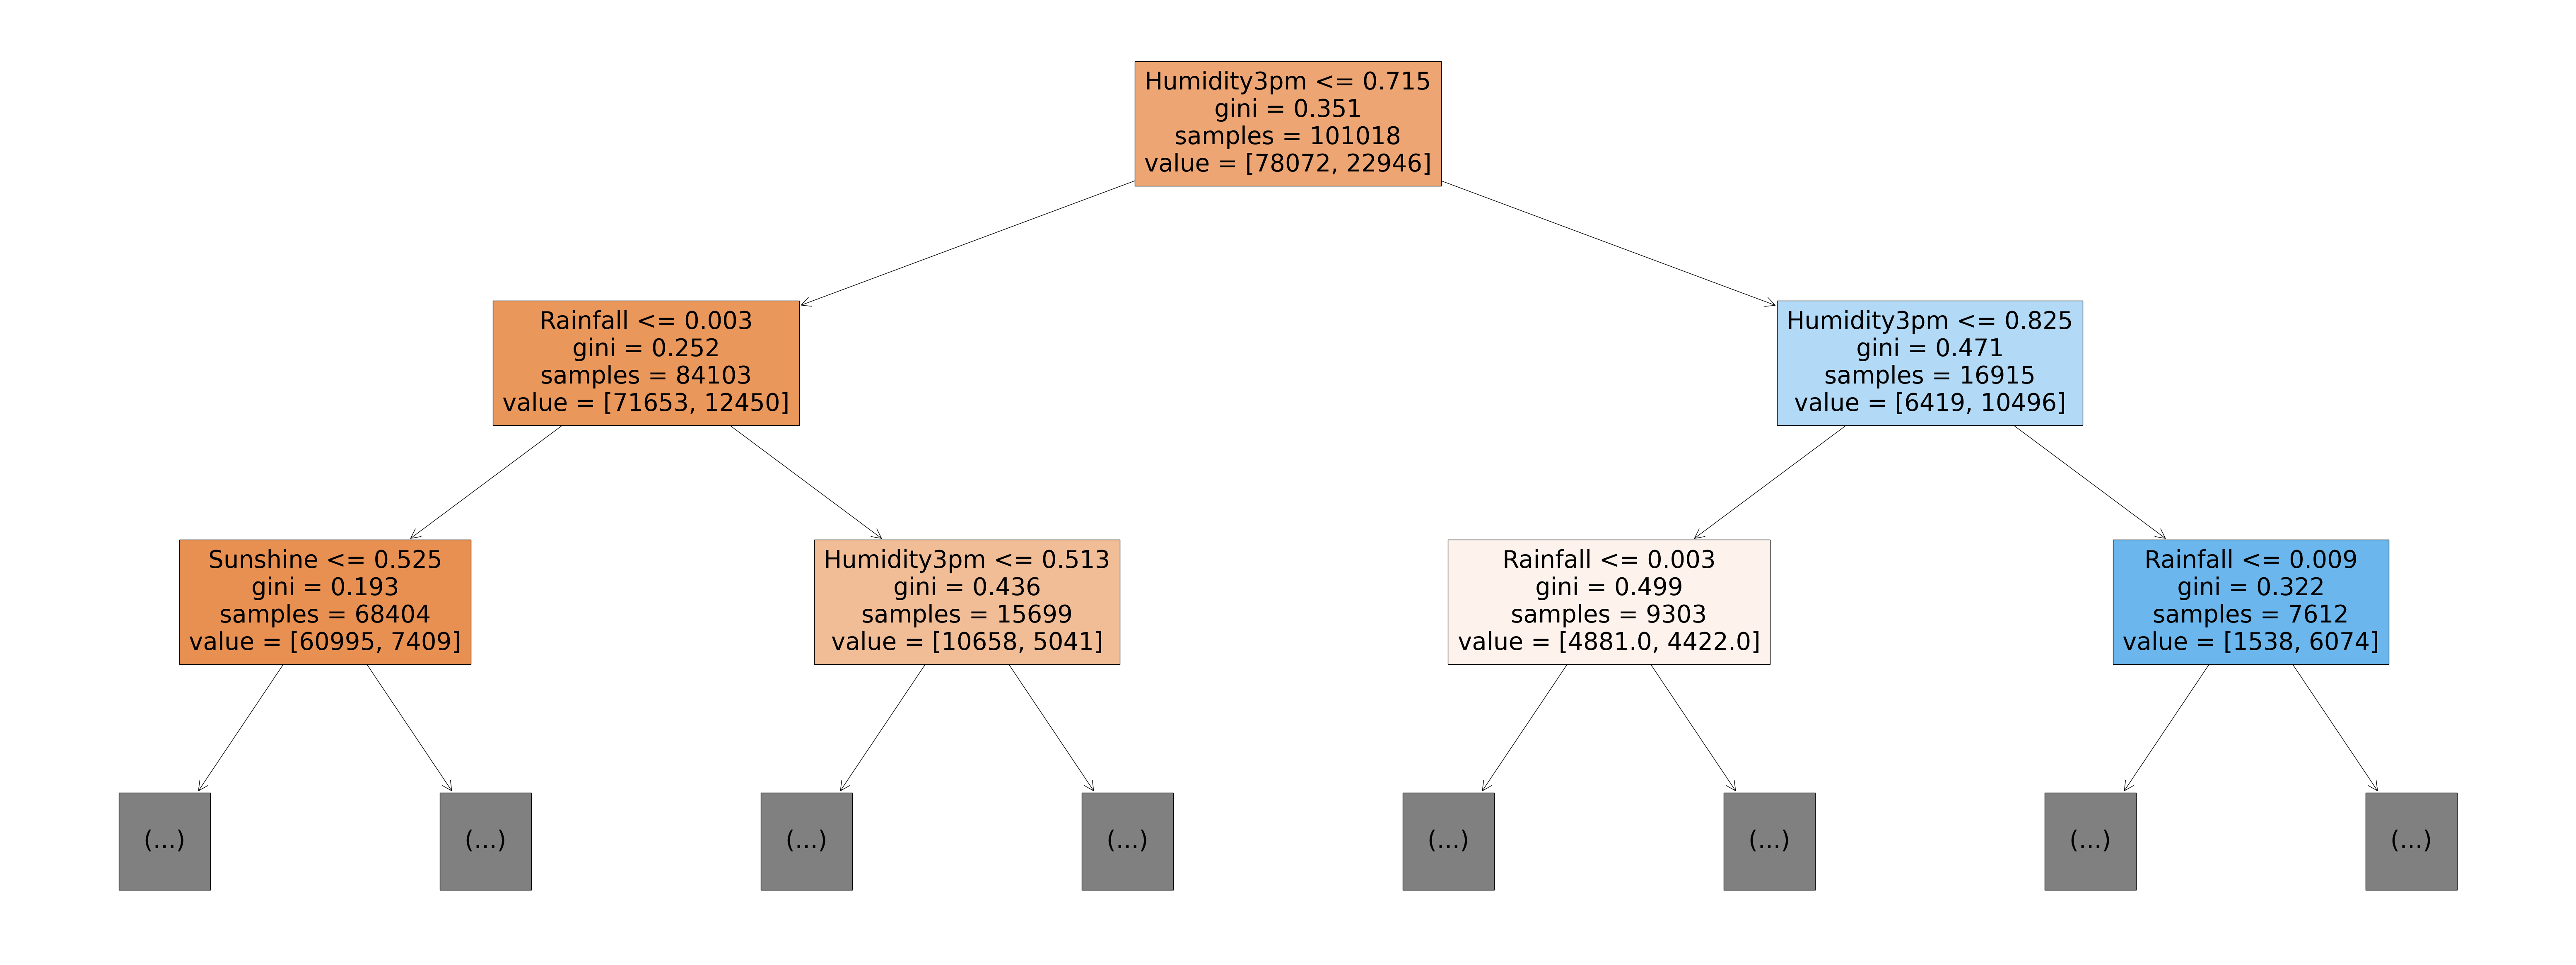

In [81]:
plt.figure(figsize=(80,30))
plot_tree(model, feature_names=X_train.columns , max_depth=2, filled=True)


In [ ]:
##  gini score is Objective function (how Good Certain Split is )A low Gini is Good Perfect Split is Gini=0